In [27]:
import pandas as pd
from database.market import Market
from processor.processor import Processor as p
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
market = Market()

In [31]:
market.connect()
enph_ticker = market.retrieve_ticker_prices("prices","TSLA")
alb_ticker = market.retrieve_ticker_prices("prices","NFLX")
market.disconnect()

In [32]:
enph_ticker = p.column_date_processing(enph_ticker)
alb_ticker = p.column_date_processing(alb_ticker)

E:\projects\longshot_venv\longshot\processor\processor.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data["week"] = data["date"].dt.week


In [20]:
alb_ticker

""


In [33]:
heh = enph_ticker[["date","adjclose"]].rename(columns={"adjclose":"enph_adjc"}).merge(alb_ticker[["date","adjclose"]],on="date")

In [34]:
heh.corr()

,enph_adjc,adjclose
enph_adjc,1.00000,0.68231
adjclose,0.68231,1.00000


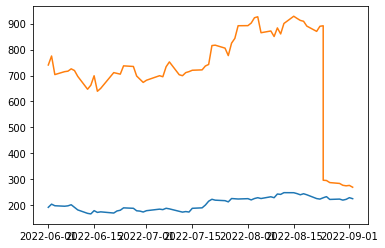

In [35]:
heh = heh[heh["date"]>=datetime(2022,6,1)]
plt.plot(heh["date"],heh["adjclose"])
plt.plot(heh["date"],heh["enph_adjc"])
plt.show()